In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Viết code numpy model linear regression cho bài toán dữ đoán giá nhà, dataset: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv.

In [224]:
df = pd.read_csv("D:/data_linear.csv")
df.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


In [225]:
type(df["Diện tích"])

pandas.core.series.Series

In [226]:
class LinearRegression:
    def fit(self, X, y):
        ones = np.ones(X.shape[0])
        self.X = np.c_[ones, X]
        inv_mat = np.linalg.inv(np.dot(self.X.T, self.X))
        self.coefs = np.dot(np.dot(inv_mat, self.X.T), y)

    def predict(self, X = None):
        if X is not None:
            ones = np.ones(X.shape[0])
            X = np.c_[ones, X]
            return np.dot(X, self.coefs)
        return np.dot(self.X, self.coefs)
    
    def rmse(self, fitted_val, y):
        return np.sqrt(np.sum(np.square(fitted_val - y))/y.shape[0])

a. Vẽ đường thẳng dự đoán và scatter plot dữ liệu gốc

In [227]:
def visualize(X, y, fitted_val):
    plt.scatter(X, y, c="blue")
    plt.plot(X, fitted_val, c="red")
    plt.xlabel("Diện tích")
    plt.ylabel("Giá nhà")
    plt.show()

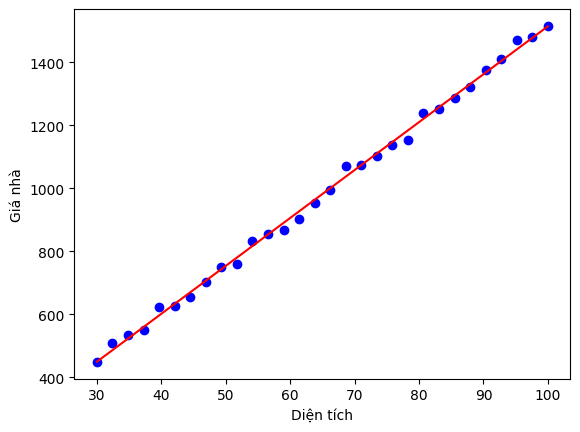

In [228]:
lr = LinearRegression()
lr.fit(df["Diện tích"], df["Giá"])
y_pred = lr.predict()
visualize(df["Diện tích"], df["Giá"], y_pred)

b. Dự đoán giá các căn nhà có diện tích 50, 100, 150

In [229]:
s = np.array([50,100,150])
lr.predict(s)

array([ 753.49027134, 1514.04481132, 2274.59935131])

Viết code numpy model linear regression cho bài toán dự đoán giá nhà, dataset: https://www.kaggle.com/prasadperera/the-boston-housing-dataset

In [230]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df1 = pd.read_csv('D:/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(df1.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [231]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [232]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


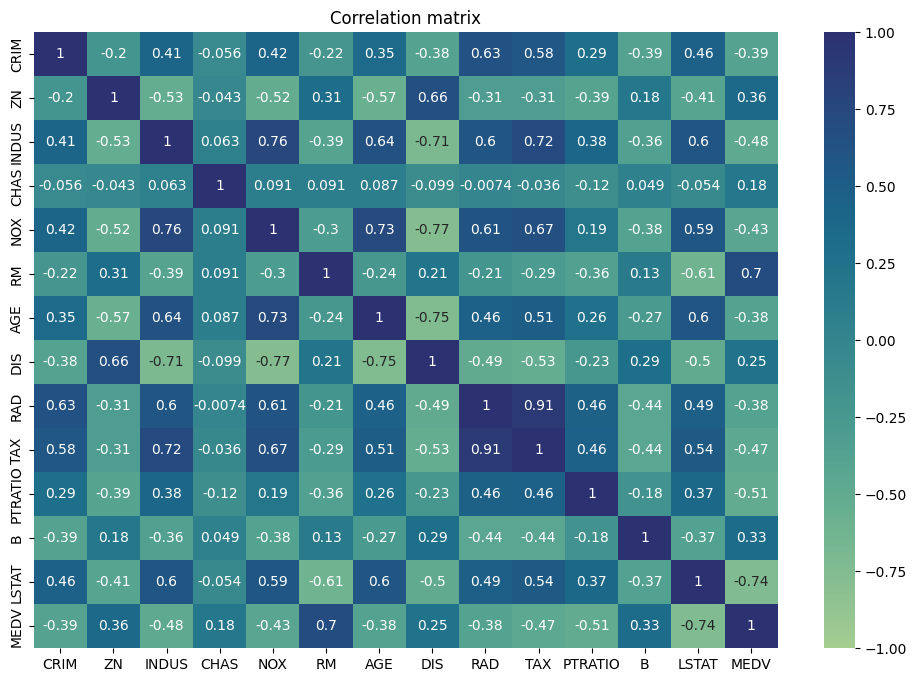

In [233]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df1.corr(method="pearson"), vmin=-1, vmax=1, annot=True, cmap='crest')
plt.title("Correlation matrix")
plt.show()

In [234]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [235]:
lr = LinearRegression()
lr.fit(df1[cols], df1['MEDV'])

In [236]:
medv_pred = lr.predict()
lr.rmse(medv_pred, df1['MEDV'])

4.679191295697282

In [237]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [238]:
X_test, X_train, y_test, y_train = train_test_split(df1[cols], df1['MEDV'], train_size=0.6, random_state=59)

In [239]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)
print("RMSE on test set")
lr1.rmse(y_pred, y_test)


RMSE on test set


4.706077316493451

In [240]:
y_pred1 = lr1.predict()
print("RMSE on train set")
lr1.rmse(y_pred1, y_train)

RMSE on train set


4.922787674237228